# Task -  Convert MNIST 784-D data to 2-D and plotting 
#### Total Data Points - 42k and features - 784

In [13]:
# MNIST dataset downloaded from Kaggle : 
#https://www.kaggle.com/c/digit-recognizer/data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Loading of MNIST dataset and removing column "label" from d0  

d0 = pd.read_csv('./mnist_train.csv')
l = d0['label']
d = d0.drop("label",axis=1)
print(d)
print(d.shape)
print(l.shape)


       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
5           0       0       0       0       0       0       0       0       0   
6           0       0       0       0       0       0       0       0       0   
7           0       0       0       0       0       0       0       0       0   
8           0       0       0       0       0       0       0       0       0   
9           0       0       0       0       0       0       0       0       0   
10          0       0       0       0       0       0       0       0       0   
11          0       0       

C:\Users\SGAJJELA\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


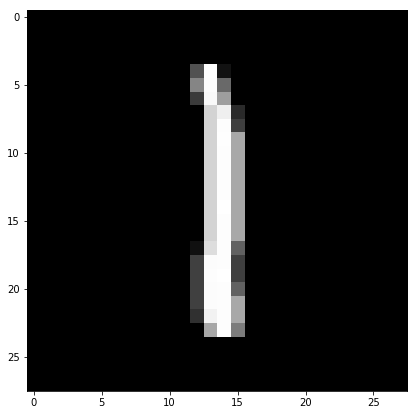

1


In [19]:
plt.figure(figsize=(7,7))
idx = 1000 #row number we want select

grid_data = d.iloc[idx].as_matrix().reshape(28,28) # converting 1D to 2D pixel array
plt.imshow(grid_data,interpolation = 'none',cmap="gray") #plotting image
plt.show()

print(l[idx])

In [35]:
#Taking Complete data 
labels = l.head(42000)
data = d.head(42000)
print("Shape of complete data =", data.shape)
print(len(data))

Shape of complete data = (42000, 784)
42000


In [40]:
#Data Processing : Standardizing data, need to import sklearn. Removing mean and dividing by variance

from sklearn.preprocessing import StandardScaler 
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)
print(standardized_data)

(42000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [94]:
#Finding Co-variance matrix whichi is A^T*A
full_data = standardized_data
covar_matrix = np.matmul(full_data.T,full_data) 
print("The shape of co-variance Matrix = ",covar_matrix.shape)


The shape of co-variance Matrix =  (784, 784)


In [105]:
#Need to find top two eigen values and eigen vectors so we compute only for 782,783, because we want o visulaize in 2-D
# Eigen values are in ascending order
from scipy.linalg import eigh
values,vectors = eigh(covar_matrix,eigvals=(782,783))
print(values)
print(vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T
print("updated shape of eign vectors= ",vectors.shape)


[1222652.44613786 1709211.41082575]
(784, 2)
updated shape of eign vectors=  (2, 784)


In [157]:
#now we need to two multiply eigen vectors with Original data

import matplotlib.pyplot as plt
print(full_data.shape)
print(vectors.shape)
new_coordinates = np.matmul(vectors,full_data.T)

print("resultant co-ordinates = ", vectors.shape, "X", full_data.T.shape, "=", new_coordinates.shape)
print(new_coordinates.shape)


(42000, 784)
(2, 784)
resultant co-ordinates =  (2, 784) X (784, 42000) = (2, 42000)
(2, 42000)


In [158]:
#we need to append the labels to new co-ordinates
import pandas as pd
print(labels.shape)
print(new_coordinates.shape)
new_coordinates = np.vstack((new_coordinates,labels)).T
dataframe = pd.DataFrame(data = new_coordinates, columns=("1st_Principal","2nd_Principal","label"))
print(dataframe.head())
print(dataframe.shape)


(42000,)
(2, 42000)
   1st_Principal  2nd_Principal  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0
(42000, 3)


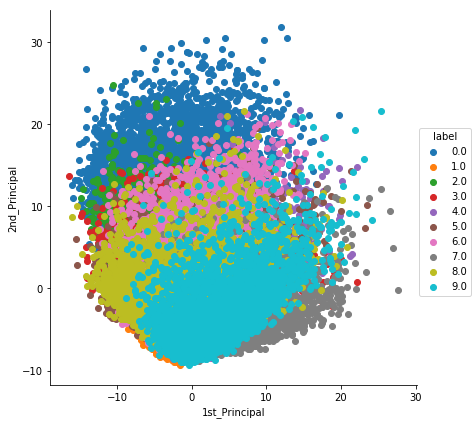

In [150]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe,hue="label",size=6).map(plt.scatter, '1st_Principal','2nd_Principal').add_legend()
plt.show()

# PCA Using Scikit-learn

In [152]:
from sklearn import decomposition
pca = decomposition.PCA()

In [181]:
#number of components
pca.n_components = 2
pca_data = pca.fit_transform(full_data)
print("Shape of full data",pca_data.shape)


Shape of full data (42000, 2)


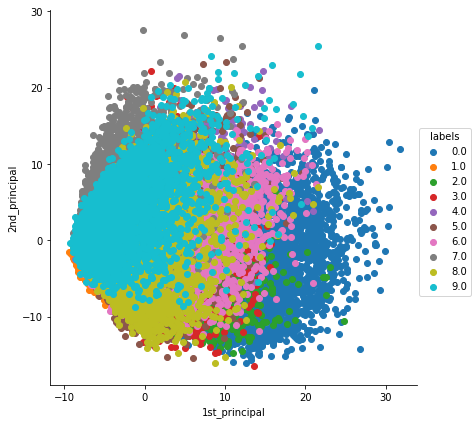

In [182]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T,labels)).T
pca_df = pd.DataFrame(data=pca_data,columns = ("1st_principal","2nd_principal","labels"))
sn.FacetGrid(pca_df,hue = "labels",size = 6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

# limitations of PCA
#### The Spread loss is high when converting from 2D to 1D.
#### When converting from 2D to 1D we cannot differentitate the data and also differentiation is diffcult in identifying points which belongs to same clustersin PCA